In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
social_df = pd.read_csv("social_media_entertainment_data.csv")

In [39]:
social_df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,1,32,Other,Germany,4.35,4.08,5,TikTok,0.35,5.43,...,20,4.11,Yes,9,Tablet,50GB,Moderate,7,8,33.04
1,2,62,Other,India,4.96,4.21,2,YouTube,2.55,4.22,...,26,4.59,Yes,9,PC,10GB,Low,8,2,497.78
2,3,51,Female,USA,6.78,1.77,4,Facebook,2.09,1.09,...,47,0.66,Yes,9,Tablet,10GB,High,5,3,71.72
3,4,44,Female,India,5.06,9.21,3,YouTube,3.69,4.80,...,22,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62
4,5,21,Other,Germany,2.57,1.30,4,TikTok,3.97,2.74,...,42,4.14,Yes,7,Smart TV,Unlimited,Low,5,9,35.90


## Before any processing

In [40]:
social_df.columns

Index(['User ID', 'Age', 'Gender', 'Country', 'Daily Social Media Time (hrs)',
       'Daily Entertainment Time (hrs)', 'Social Media Platforms Used',
       'Primary Platform', 'Daily Messaging Time (hrs)',
       'Daily Video Content Time (hrs)', 'Daily Gaming Time (hrs)',
       'Occupation', 'Marital Status', 'Monthly Income (USD)', 'Device Type',
       'Internet Speed (Mbps)', 'Subscription Platforms',
       'Average Sleep Time (hrs)', 'Physical Activity Time (hrs)',
       'Reading Time (hrs)', 'Work/Study Time (hrs)', 'Screen Time (hrs)',
       'Notifications Received Daily', 'Daily Music Listening Time (hrs)',
       'Preferred Content Type', 'Primary Social Media Goal',
       'Preferred Entertainment Platform',
       'Time Spent in Online Communities (hrs)',
       'Social Media Fatigue Level (scale 1-10)',
       'News Consumption Time (hrs)', 'Ad Interaction Count',
       'Time on Educational Platforms (hrs)', 'Parental Status',
       'Tech Savviness Level (scale 1-10

In [41]:
social_df.shape

(300000, 40)

## Drop features

In [42]:
social_df.drop(columns=['User ID','Subscription Platforms',
                        'Device Type','Notifications Received Daily',
                        'Parental Status','Preferred Device for Entertainment',
                        'Data Plan Used','Occupation','Internet Speed (Mbps)'], inplace=True)

In [44]:
social_df.columns

Index(['Age', 'Gender', 'Country', 'Daily Social Media Time (hrs)',
       'Daily Entertainment Time (hrs)', 'Social Media Platforms Used',
       'Primary Platform', 'Daily Messaging Time (hrs)',
       'Daily Video Content Time (hrs)', 'Daily Gaming Time (hrs)',
       'Marital Status', 'Monthly Income (USD)', 'Average Sleep Time (hrs)',
       'Physical Activity Time (hrs)', 'Reading Time (hrs)',
       'Work/Study Time (hrs)', 'Screen Time (hrs)',
       'Daily Music Listening Time (hrs)', 'Preferred Content Type',
       'Primary Social Media Goal', 'Preferred Entertainment Platform',
       'Time Spent in Online Communities (hrs)',
       'Social Media Fatigue Level (scale 1-10)',
       'News Consumption Time (hrs)', 'Ad Interaction Count',
       'Time on Educational Platforms (hrs)',
       'Tech Savviness Level (scale 1-10)', 'Digital Well-being Awareness',
       'Sleep Quality (scale 1-10)', 'Social Isolation Feeling (scale 1-10)',
       'Monthly Expenditure on Entertainme

In [43]:
social_df.dtypes

Age                                             int64
Gender                                         object
Country                                        object
Daily Social Media Time (hrs)                 float64
Daily Entertainment Time (hrs)                float64
Social Media Platforms Used                     int64
Primary Platform                               object
Daily Messaging Time (hrs)                    float64
Daily Video Content Time (hrs)                float64
Daily Gaming Time (hrs)                       float64
Marital Status                                 object
Monthly Income (USD)                          float64
Average Sleep Time (hrs)                      float64
Physical Activity Time (hrs)                  float64
Reading Time (hrs)                            float64
Work/Study Time (hrs)                         float64
Screen Time (hrs)                             float64
Daily Music Listening Time (hrs)              float64
Preferred Content Type      

In [45]:
social_df.shape

(300000, 31)

In [46]:
social_df.describe()

,Age,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Daily Messaging Time (hrs),Daily Video Content Time (hrs),Daily Gaming Time (hrs),Monthly Income (USD),Average Sleep Time (hrs),Physical Activity Time (hrs),...,Daily Music Listening Time (hrs),Time Spent in Online Communities (hrs),Social Media Fatigue Level (scale 1-10),News Consumption Time (hrs),Ad Interaction Count,Time on Educational Platforms (hrs),Tech Savviness Level (scale 1-10),Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,38.530547,4.254808,5.244080,3.000143,2.598320,3.749153,2.499733,5256.918847,6.497167,1.500487,...,3.246100,2.000779,5.003780,1.500046,24.48071,2.500206,5.009983,5.006430,5.004487,249.670252
std,15.005038,2.165604,2.741804,1.413682,1.385418,1.877316,1.443159,2741.260952,1.442706,0.865496,...,1.587595,1.154578,2.580703,0.866270,14.42579,1.441704,2.584137,2.579214,2.583077,144.372234
min,13.000000,0.500000,0.500000,1.000000,0.200000,0.500000,0.000000,500.010000,4.000000,0.000000,...,0.500000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,26.000000,2.380000,2.870000,2.000000,1.400000,2.120000,1.250000,2883.817500,5.250000,0.750000,...,1.870000,1.000000,3.000000,0.750000,12.00000,1.250000,3.000000,3.000000,3.000000,124.350000
50%,39.000000,4.260000,5.240000,3.000000,2.600000,3.750000,2.500000,5259.010000,6.500000,1.500000,...,3.240000,2.000000,5.000000,1.500000,24.00000,2.500000,5.000000,5.000000,5.000000,249.900000
75%,52.000000,6.130000,7.620000,4.000000,3.790000,5.370000,3.750000,7630.525000,7.750000,2.250000,...,4.620000,3.000000,7.000000,2.250000,37.00000,3.750000,7.000000,7.000000,7.000000,374.370000
max,65.000000,8.000000,10.000000,5.000000,5.000000,7.000000,5.000000,9999.930000,9.000000,3.000000,...,6.000000,4.000000,10.000000,3.000000,50.00000,5.000000,10.000000,10.000000,10.000000,500.000000


In [47]:
social_df.isna().sum()

Age                                           0
Gender                                        0
Country                                       0
Daily Social Media Time (hrs)                 0
Daily Entertainment Time (hrs)                0
Social Media Platforms Used                   0
Primary Platform                              0
Daily Messaging Time (hrs)                    0
Daily Video Content Time (hrs)                0
Daily Gaming Time (hrs)                       0
Marital Status                                0
Monthly Income (USD)                          0
Average Sleep Time (hrs)                      0
Physical Activity Time (hrs)                  0
Reading Time (hrs)                            0
Work/Study Time (hrs)                         0
Screen Time (hrs)                             0
Daily Music Listening Time (hrs)              0
Preferred Content Type                        0
Primary Social Media Goal                     0
Preferred Entertainment Platform        

## Visualization

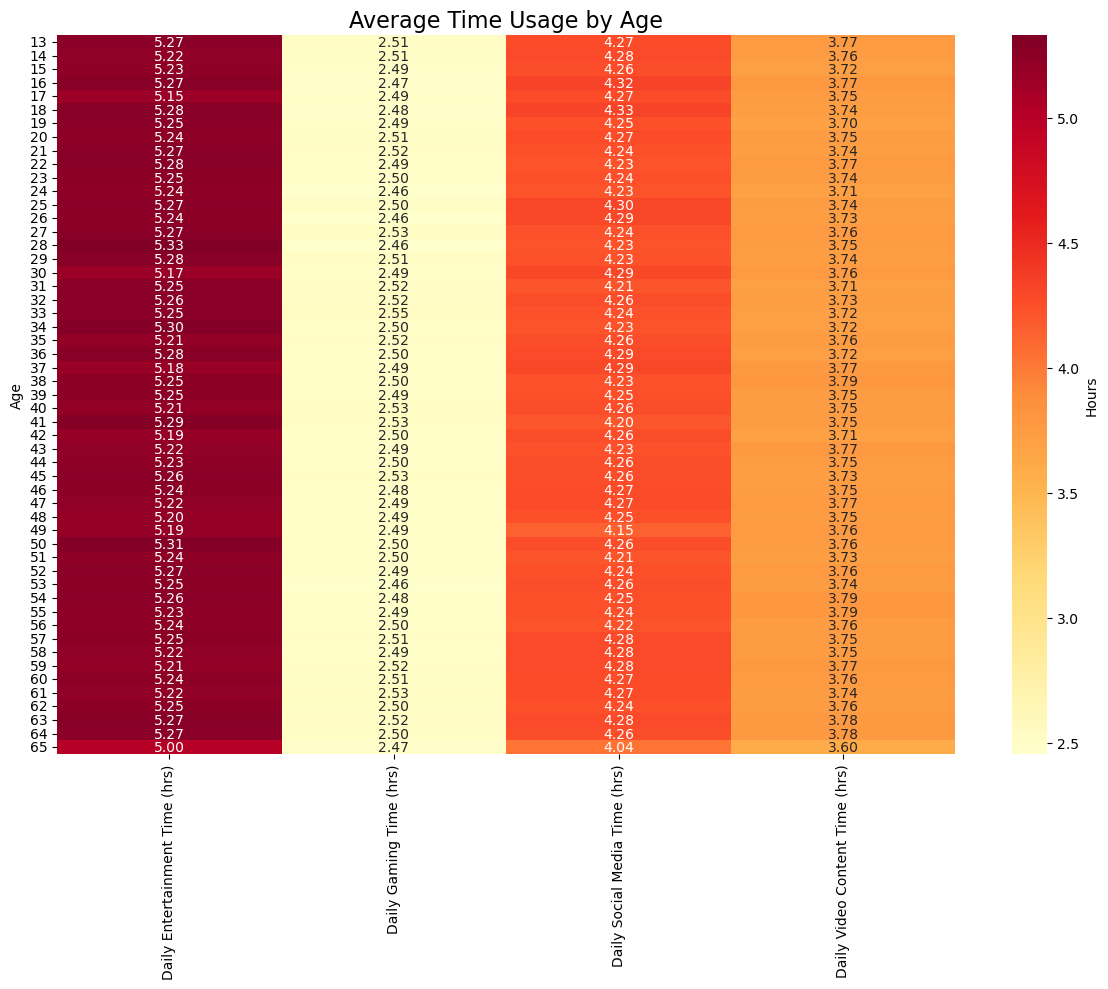

In [11]:
pivot = social_df.pivot_table(values=['Daily Social Media Time (hrs)', 'Daily Entertainment Time (hrs)', 
                               'Daily Gaming Time (hrs)', 'Daily Video Content Time (hrs)'], 
                       index='Age', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".2f", cbar_kws={'label': 'Hours'})
plt.title('Average Time Usage by Age', fontsize=16)
plt.tight_layout()
plt.show()

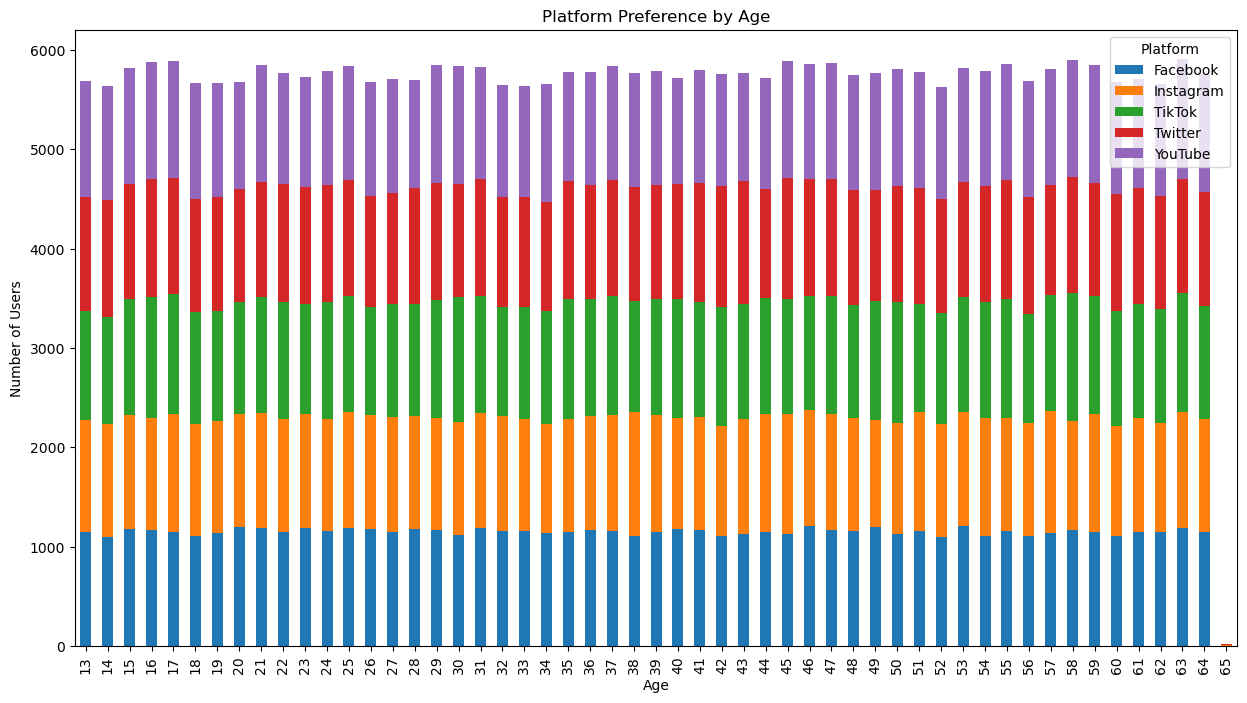

In [12]:
platform_preference = social_df.groupby(['Age', 'Primary Platform']).size().unstack()
platform_preference.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Platform Preference by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend(title='Platform')
plt.show()

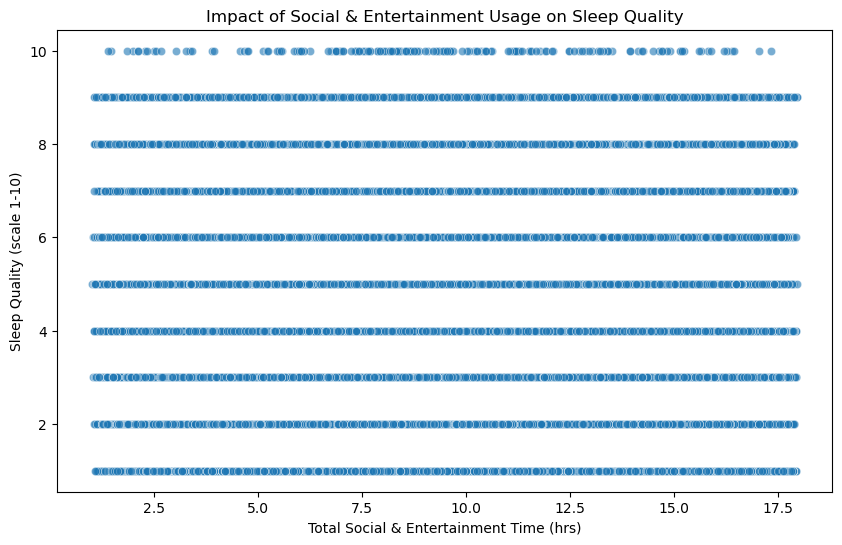

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=social_df["Daily Social Media Time (hrs)"] + social_df["Daily Entertainment Time (hrs)"], 
                y=social_df["Sleep Quality (scale 1-10)"], alpha=0.6)
plt.xlabel("Total Social & Entertainment Time (hrs)")
plt.ylabel("Sleep Quality (scale 1-10)")
plt.title("Impact of Social & Entertainment Usage on Sleep Quality")
plt.show()

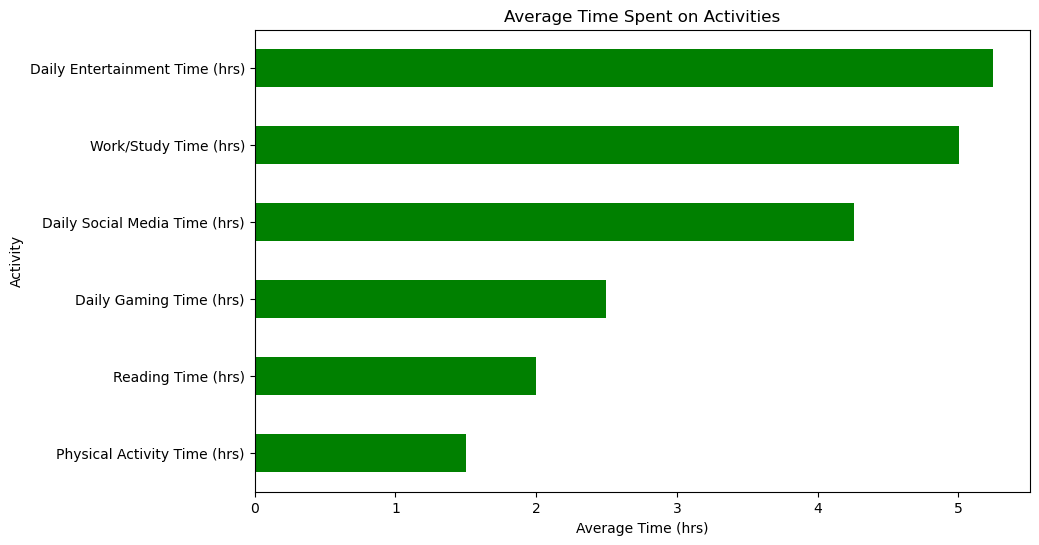

In [14]:
activity_columns = ['Daily Social Media Time (hrs)', 'Daily Entertainment Time (hrs)', 
                    'Daily Gaming Time (hrs)', 'Physical Activity Time (hrs)', 
                    'Reading Time (hrs)', 'Work/Study Time (hrs)']
average_time = social_df[activity_columns].mean().sort_values()

average_time.plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Average Time Spent on Activities')
plt.xlabel('Average Time (hrs)')
plt.ylabel('Activity')
plt.show()

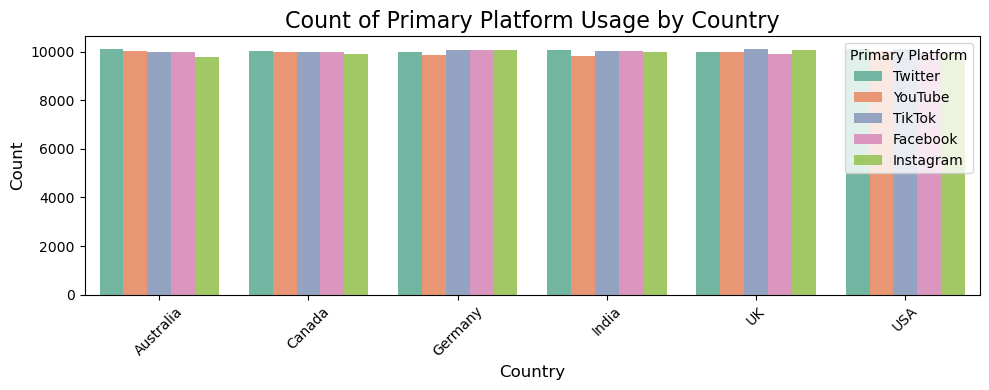

In [15]:
grouped_data = social_df.groupby(['Country', 'Primary Platform']).size().reset_index(name='Count')
grouped_data_sorted = grouped_data.sort_values(by=['Country', 'Count'], ascending=[True, False])

plt.figure(figsize=(10, 4))
sns.barplot(
    x='Country', 
    y='Count', 
    hue='Primary Platform', 
    data=grouped_data_sorted, 
    palette='Set2'
)

# Add titles and labels
plt.title('Count of Primary Platform Usage by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()